# Real or Not? NLP with Disaster Tweets - Kaggle Competition
### Predicting which Tweets are about real disasters and which ones are not

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import re
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploratory Data Analysis of tweets
#### I will first do an analysis of the tweets by plotting the number of characters and words.

#### Number of Characters in a Tweet

Text(0.5, 0.98, 'Number of Characters in a Tweet')

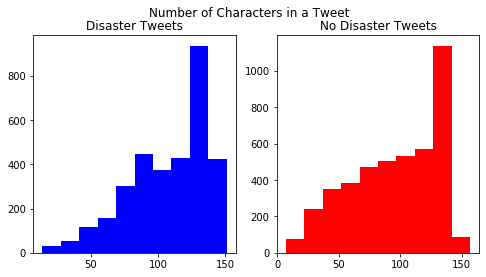

In [3]:
fig, (a1, a2) = plt.subplots(1, 2, figsize = (8, 4))
tweet_dis_char_len = train.loc[train['target'] == 1]['text'].str.len() #number of characters in a tweet
#with target denoted as 1 (disaster)
tweet_nodis_char_len = train.loc[train['target'] == 0]['text'].str.len() #number of characters in a tweet
#with target denoted as 0 (no disaster)
a1.hist(tweet_dis_char_len, color = 'blue')
a2.hist(tweet_nodis_char_len, color = 'red')
a1.set_title('Disaster Tweets')
a2.set_title('No Disaster Tweets')
fig.suptitle('Number of Characters in a Tweet')

#### Number of Words in a Tweet

In [4]:
#Helper function to count length of words in tweet
def count_words(tweet):
    tweet = str(tweet) #convert dtype to string
    return len(tweet.split()) #split the string into words in a list, and count the list

Text(0.5, 0.98, 'Number of Words in Tweet')

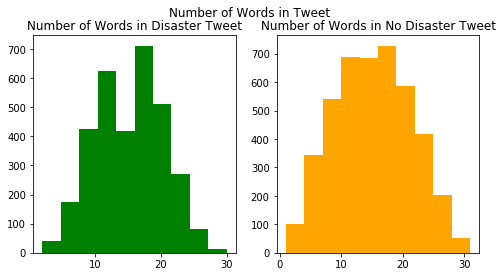

In [5]:
fig2, (a3, a4) = plt.subplots(1, 2, figsize = (8,4))
tweet_dis_word_len = train.loc[train['target'] == 1]['text'].apply(count_words) #number of words in a disaster tweet
tweet_nodis_word_len = train.loc[train['target'] == 0]['text'].apply(count_words) #number of words in no
#disaster tweet
a3.hist(tweet_dis_word_len, color = 'green')
a4.hist(tweet_nodis_word_len, color = 'orange')
a3.set_title('Number of Words in Disaster Tweet')
a4.set_title('Number of Words in No Disaster Tweet')
fig2.suptitle('Number of Words in Tweet')

In [10]:
#most common key words for no disasters
train.loc[train['target'] == 0]['keyword'].value_counts().head()

body%20bags    40
armageddon     37
harm           37
wrecked        36
ruin           36
Name: keyword, dtype: int64

In [11]:
#most common key words for disasters
train.loc[train['target'] == 1]['keyword'].value_counts().head()

derailment     39
outbreak       39
wreckage       39
typhoon        37
oil%20spill    37
Name: keyword, dtype: int64

In [12]:
#most common location for no disasters
train.loc[train['target'] == 0]['location'].value_counts().head()

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Name: location, dtype: int64

In [13]:
#most common location for disasters
train.loc[train['target'] == 1]['location'].value_counts().head()

USA              67
United States    27
Nigeria          22
India            20
Mumbai           19
Name: location, dtype: int64

## Data Cleaning
#### I will be cleaning the text data to help me with my classification predictions by removing unnecessary words or characters

##### Removing emojis from the tweet

In [30]:
def de_emojify(s):
    emoji_pat = re.compile("["
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
    return emoji_pat.sub(r'', s)
train['text'] = train['text'].apply(de_emojify)
test['text'] = test['text'].apply(de_emojify)

##### Removing urls from the tweet

In [31]:
def clean_link(s):
    s = re.sub('https?://\S+', '', s)
    return s
train['text'] = train['text'].apply(clean_link)
test['text'] = test['text'].apply(clean_link)

##### Removing HTML tags from tweet

In [32]:
def clean_html(s):
    html = re.compile(r'<.*?>')
    return html.sub(r'', s)
train['text'] = train['text'].apply(clean_html)
test['text'] = test['text'].apply(clean_html)

##### Removing hashtags from tweet

In [33]:
def clean_punc(s):
    s = re.sub('#', '', s)
    return s
train['text'] = train['text'].apply(clean_punc)
test['text'] = test['text'].apply(clean_punc)

## Vectorization of the text data
#### I will be using a scikit-learn module to help me transform raw texts into numerical vectors using TF-IDF method

In [39]:
tf = TfidfVectorizer()
tf_train = tf.fit_transform(train['text'])
tf_test = tf.transform(test['text'])

### K nearest neighbors
#### I will be using k nearest neighbors to predict the classification of the tweets and use cross validation score from scikitlearn to measure the accuracy

In [46]:
knn = KNeighborsClassifier(90)
knn.fit(tf_train, train['target'])
cv_scores = cross_val_score(knn, tf_train, train['target'], cv = 4)
print('Cross Validation Scores of 4 fold of K nearest neighbors:', cross_vali)
print('Mean of Cross Validation Scores:', np.mean(cv_scores))

Cross Validation Scores of 4 fold of K nearest neighbors: [0.72111345 0.72426471 0.71203363 0.74605678]
Mean of Cross Validation Scores: 0.7258671411759161


In [52]:
output_df = pd.DataFrame({'id': test['id'], 'target': knn.predict(tf_test)})
output_df.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [51]:
submission = output_df.to_csv('submission.csv', index=False)